In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns

In [37]:
df=pd.read_csv("drinking-water-quality-distribution-monitoring-data-1.csv")

# Perform Exploratory Data analysis

In [4]:
df.head()

,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Location,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,NaN,01/01/2015,12:19,1S07,Operational,SS - Shaft 7 of City Tunnel No. 1 - W/S Sedgwi...,0.58,0.96,0.79,<1,<1
1,NaN,01/01/2015,11:15,1S04,Operational,SS - Shaft 4 of City Tunnel No.1 - IFO 2780 Re...,0.71,0.94,0.80,<1,<1
2,NaN,01/01/2015,10:09,1S03A,Operational,SS - Shaft 3A of City Tunnel No. 2 - IFO 823 S...,0.79,0.93,0.79,<1,<1
3,NaN,01/01/2015,10:41,1S03B,Operational,SS - Shaft 3B of City Tunnel No. 3 - Mosholu A...,0.77,0.93,0.80,<1,<1
4,NaN,01/01/2015,09:38,11550,Compliance,"SS - IFO 1058 S/S E Gun Hill Rd, 1st SS E/O Ho...",0.74,0.95,NaN,<1,<1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51327 entries, 0 to 51326
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sample Number                        42463 non-null  float64
 1   Sample Date                          51327 non-null  object 
 2   Sample Time                          51327 non-null  object 
 3   Sample Site                          51327 non-null  object 
 4   Sample class                         51327 non-null  object 
 5   Location                             51327 non-null  object 
 6   Residual Free Chlorine (mg/L)        51324 non-null  float64
 7   Turbidity (NTU)                      51165 non-null  float64
 8   Fluoride (mg/L)                      6595 non-null   float64
 9   Coliform (Quanti-Tray) (MPN /100mL)  51327 non-null  object 
 10  E.coli(Quanti-Tray) (MPN/100mL)      51327 non-null  object 
dtypes: float64(4), object(7)
mem

Before jumping into EDA, let us first rename the column names for our ease of use

In [38]:
df.rename(columns={"Residual Free Chlorine (mg/L)":"Residual Free Chlorine","Turbidity (NTU)":"Turbidity","Fluoride (mg/L)":"Fluoride","Coliform (Quanti-Tray) (MPN /100mL)":"Coliform","E.coli(Quanti-Tray) (MPN/100mL)":"Ecoli"}, inplace=True)

In [11]:
df.columns

Index(['Sample Number', 'Sample Date', 'Sample Time', 'Sample Site',
       'Sample class', 'Location', 'Residual Free Chlorine', 'Turbidity',
       'Fluoride', 'Coliform', 'Ecoli'],
      dtype='object')

In [13]:
df.shape

(51327, 11)

In [12]:
df.isnull().sum()

Sample Number              8864
Sample Date                   0
Sample Time                   0
Sample Site                   0
Sample class                  0
Location                      0
Residual Free Chlorine        3
Turbidity                   162
Fluoride                  44732
Coliform                      0
Ecoli                         0
dtype: int64

There are many missing values for Sample Number, Fluoride, and Turbidity samples and we need to deal with thos missing values. Fluoride has 44,732 missing values which is almost 85 % of total records. This is too much of missing data for analysis. We can drop Sample Numbers which are just a unique identifier for each testing

In [39]:
df.drop(columns=["Sample Number"],inplace=True)

In [21]:
df.columns

Index(['Sample Date', 'Sample Time', 'Sample Site', 'Sample class', 'Location',
       'Residual Free Chlorine', 'Turbidity', 'Fluoride', 'Coliform', 'Ecoli'],
      dtype='object')

# Total unique locations in the dataset

In [40]:
unique_locations=df["Location"].unique()
print("Length of unique locations in the dataset",len(unique_locations))

Length of unique locations in the dataset 782


# Analyzing the quality of water based on Residual Free Chlorine


Chlorine is added to water to inactivate bacterias and viruses which can cause water borne diseases. As per WHO the maximum allowable value for free chlorine residual in drinking water is 5 mg/L. Let us see if we have samples with value more than the recommended one

In [42]:
df[df["Residual Free Chlorine"]>=5].sum()

Sample Date               0.0
Sample Time               0.0
Sample Site               0.0
Sample class              0.0
Location                  0.0
Residual Free Chlorine    0.0
Turbidity                 0.0
Fluoride                  0.0
Coliform                  0.0
Ecoli                     0.0
dtype: float64

From above graph we can see that none of the records has Residual Free Chlorine value more than 5 mg/L. 
**This concludes that all samples had recommended value range of Residual Free Chlorine and is safe for drinking**

<AxesSubplot:xlabel='Residual Free Chlorine', ylabel='Density'>

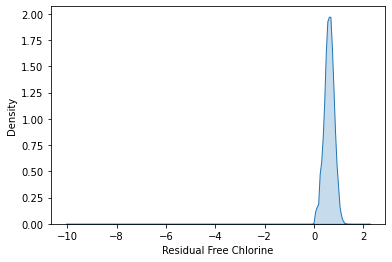

In [48]:
sns.kdeplot(df["Residual Free Chlorine"],shade=True)

**The value of Residual Free Chlorine mostly lies between 0 to 1.7 which is well below the recommended value of 5 mg/L**

# Analyzing the quality of Turbidity

In [51]:
df[df["Turbidity"]>1]

,Sample Date,Sample Time,Sample Site,Sample class,Location,Residual Free Chlorine,Turbidity,Fluoride,Coliform,Ecoli
5,01/01/2015,08:41,13850,Compliance,"SS - IFO 1778 E/S Jerome Ave, 1st SS S/O E 176...",0.59,1.08,NaN,<1,<1
12,01/01/2015,09:00,23650,Compliance,"SS - E/S Nostrand Ave, 2nd SS N/O Ave W, 20 inch",0.63,1.02,NaN,<1,<1
15,01/01/2015,10:28,27000,Operational,"SS - IFO 383 W/S Hooper St, btw S 1st & S 2nd ...",0.53,1.06,NaN,<1,<1
22,01/01/2015,08:07,40200,Operational,"SS - S/S 19th Ave, btw 41st & Steinway Sts, 60...",0.73,1.18,NaN,<1,<1
26,01/01/2015,12:54,41850,Compliance,"SS - IFO 67-02 W/S Bell Blvd, 1st SS S/O 67th ...",0.54,1.17,NaN,<1,<1
...,...,...,...,...,...,...,...,...,...,...
50776,06/18/2018,08:31,47500,Operational,"SS - IFO 20-10 W/S Cross Bay Blvd, btw W 20th ...",0.61,1.17,NaN,<1,<1
51048,06/24/2018,11:27,45850,Compliance,"SS - N/S Sutter Ave, 1st SS E/O 91st St, 12""",0.60,1.07,NaN,<1,<1
51054,06/24/2018,10:25,77550,Compliance,"SS - IFO E/S 222nd St, btw 91st Rd & 92nd Ave",0.34,1.83,NaN,<1,<1
51257,06/29/2018,09:05,21850,Compliance,"SS - IFO 37 E/S 7th Ave, 1st SS S/O St Johns P...",0.51,1.03,NaN,<1,<1


**Out of total 51 K samples, 5924 samples were found to have Turbidity greater than recommended value of 1 NTU.** We need to analyze the locations having turbidity greater than 1 NTU

Let us check what percentage of samples are crossing the recommended limits

In [53]:
records_with_high_turbidity=df[df["Turbidity"]>1].shape[0]
total_records = df.shape[0]
print("Percentage of records with high turbidity",(records_with_high_turbidity/total_records)*100,"%")

Percentage of records with high turbidity 11.541683714224483 %


In [55]:
location_with_high_turbidity = list(df[df["Turbidity"] > 1]["Location"])

In [56]:
from collections import Counter
locations = dict(Counter(location_with_high_turbidity))
print("Location with max number of samples resulting in high turbidity than recommended - ",  max(locations, key = locations.get))

Location with max number of samples resulting in high turbidity than recommended -  SS - S/S 19th Ave, btw 41st & Steinway Sts, 60 inch


# Anlayzing the quantity of Coliform

Coliform bacteria are organisms that are present in the environment and in the feces of all warm-blooded animals and humans. Coliform bacteria will not likely cause illness. However, their presence in drinking water indicates that disease-causing organisms (pathogens) could be in the water system. As per the recommendation, no sample should contain more than 10 coliform organisms per 100 ml

Let us remove all special charaters from Coliform column and convert the data into float

In [59]:
df["Coliform"] = df["Coliform"].str.replace("<", "")
df["Coliform"] = df["Coliform"].str.replace(">", "")
df["Coliform"] = df["Coliform"].str.replace(" ", "")
df["Coliform"] = df["Coliform"].str.replace("-", "")

df["Coliform"] = pd.to_numeric(df["Coliform"], errors = "ignore")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51327 entries, 0 to 51326
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample Date             51327 non-null  object 
 1   Sample Time             51327 non-null  object 
 2   Sample Site             51327 non-null  object 
 3   Sample class            51327 non-null  object 
 4   Location                51327 non-null  object 
 5   Residual Free Chlorine  51324 non-null  float64
 6   Turbidity               51165 non-null  float64
 7   Fluoride                6595 non-null   float64
 8   Coliform                51326 non-null  float64
 9   Ecoli                   51327 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.9+ MB


As per the recommendation, we should not have Coliform value more than 10. Let us see how many of the samples have values greater than 10



In [61]:
df[df["Coliform"] > 10]

,Sample Date,Sample Time,Sample Site,Sample class,Location,Residual Free Chlorine,Turbidity,Fluoride,Coliform,Ecoli
4082,04/14/2015,08:57,20300,Operational,"SS - N/S Luquer St, btw Columbia & Hicks Sts, ...",0.62,1.24,NaN,17.8,<1
6663,06/12/2015,11:26,45000,Operational,"SS - E/S Douglaston Pkwy, btw 66th & 67th Aves...",0.61,1.13,NaN,12.4,<1
7570,07/02/2015,08:46,79550,Compliance,"SS - Opp 109-11 W/S 127th St, 2nd SS S/O 109th...",0.06,0.75,NaN,20.7,<1
7645,07/04/2015,09:46,79550,Resample_Compliance,"W/S 127th St, 1st HT N/O Hawtree St",0.07,1.52,NaN,23.8,<1
7904,07/10/2015,10:44,50650,Compliance,"SS - E/S York Ave, 1st SS N/O Pauw St, 8""",0.54,0.73,NaN,13.7,<1
...,...,...,...,...,...,...,...,...,...,...
44016,12/16/2017,10:08,1S07,Operational,SS - Shaft 7 of City Tunnel No. 1 - W/S Sedgwi...,0.67,0.87,0.72,200.5,<1
44032,12/16/2017,10:00,28550,Compliance,"SS - E/S W 5th St, 2nd SS S/O Neptune Ave, 12 ...",0.64,0.91,NaN,200.5,<1
45100,01/11/2018,10:12,1S03,Operational,"Shaft 3 riser feed, Tap in Gatehouse #7 Jerome...",0.68,0.90,0.76,200.5,<1
45811,01/26/2018,10:40,59350,Compliance,"SS - IFO 1824 S/S Victory Blvd, btw Raymond Av...",0.56,0.85,NaN,200.5,<1


**There are 70 samples with Coliform value greater than 10** 

Let us get the list of locations with this Coliform value

In [62]:
locations_with_high_coliform = list(df[df["Coliform"] > 10]["Location"])

In [64]:
locations = dict(Counter(locations_with_high_coliform))
print("Location with max number of samples resulting in high coliform than recommended - ",  max(locations, key = locations.get))

Location with max number of samples resulting in high coliform than recommended -  SS - Shaft 3A of City Tunnel No. 2 - IFO 823 S/S E 233rd St, W/O Bronxwood Ave


# Locations having Turbidity and Coliform value more than recommended one

Let us get the list of locations where both Turbidity and Coliform is highger than the recommended value

In [65]:
common_list = []
for location_coliform in locations_with_high_coliform:
    for location_turbidity in location_with_high_turbidity:
        if location_coliform == location_turbidity:
            common_list.append(location_coliform)

common_locations = list(set(common_list))
print("Number of locations with high values of Turbidity and Coliform ", len(common_locations))

Number of locations with high values of Turbidity and Coliform  55


# Conclusions

**None of the samples had Residual Free Chlorine value crossing the WHO recommended count**

**11% of samples suggested that water is not good for drinking due to high Turbidity** - 5924 samples, i.e. 11% of samples were found to have high turbidity. Out of these samples "SS - S/S 19th Ave, btw 41st & Steinway Sts, 60 inch" had most number of samples crossing the defined limits of risk.

**0.13 % samples suggest that water is not good for drinking due to high Coliform value** - 70 samples were found to have higher Coliform value than the recommended amount of 10 per 100 ml of drinking water. Out of these samples  "SS - Shaft 3A of City Tunnel No. 2 - IFO 823 S/S E 233rd St, W/O Bronxwood Ave" had most number of samples crossing the defined limits of risk.

**7% of locations had water not good for drinking** - There are 55 locations in New York with both high Turbidity and high Coliform count